# Control Theory
## 3rd meeting
2nd order systems

In [1]:
# Initialization, imports, sympy setup, etc:
from sympy import *
from matplotlib import pyplot as plt
init_printing(use_unicode=False, wrap_line=False)
from IPython.display import display, Markdown
t = Symbol('t')
tau = Symbol('tau')
a = Symbol('a')
b = Symbol('b')
u = Symbol('u')
x0 = Symbol('x0')
t0 = Symbol('t0')


# from jupyterthemes import jtplot
# jtplot.style()

As we remember, during last class we examined a first order system, deriving a response for an arbitrary input u(t):

General solution for 1st order linear system:


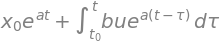

In [2]:
sys = exp(a*t)*x0 + Integral(exp((t-tau)*a)*b*u, (tau, t0, t))
print('General solution for 1st order linear system:')
sys

Derived equation can be utilized for higher order systems described with a set of first order equations in matrix form (state sapce representation). 

Let's reformulate derived equations using A and B matrices instead of a and b parameters:

General solution for set of 1st order linear equations:


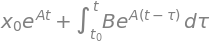

In [3]:
A = Symbol('A')
B = Symbol('B')
step = (exp(A*t))*x0 + Integral(exp((t-tau)*A)*B, (tau, t0, t))
print('General solution for set of 1st order linear equations:')
step

Note that in this case we "raise e to the power of a matrix", or, more precisely, we compute a *matrix exponential*. For in-depth explanation of this operation, please refer to: https://www.youtube.com/watch?v=O85OWBJ2ayo

We will test this on a mass-spring-damper system described with following matrices:

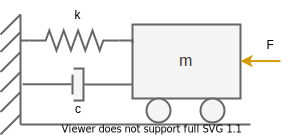

In [4]:
from IPython.display import SVG, display

display(SVG(filename='spring_mass_damper.svg'))


In [5]:
# Parameters defining the system
m = 150.0           # system mass
k = 40.0            # spring constant
b = 30.0            # damping constant
m = Symbol('m')
k = Symbol('k')
b = Symbol('b')

A = Matrix([[0, 1.], [-k/m, -b/m]])
B = Matrix([[0], [1/m]])

display(
    Markdown('A: {}, B: {}'.format(latex(A, mode='inline'), latex(B, mode='inline')))
)

A: $\left[\begin{smallmatrix}0 & 1.0\\- k / m & - b / m\end{smallmatrix}\right]$, B: $\left[\begin{smallmatrix}0\\1 / m\end{smallmatrix}\right]$

And initial conditions:

In [6]:
x0 = Matrix([[0],   # initial position
             [0]])  # initial velocity

display(Markdown(f'x0={latex(x0, mode="inline")}'))

x0=$\left[\begin{smallmatrix}0\\0\end{smallmatrix}\right]$

In [7]:
zero_input = ((exp(A*t))*x0) + (exp((t-tau)*A)*B).integrate((tau, t0, t))

x[0] (Position):


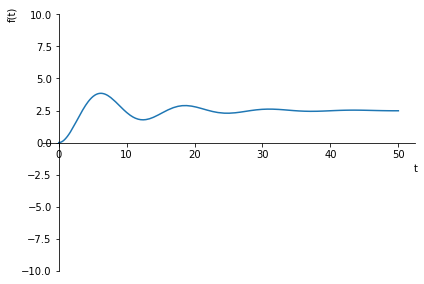

In [8]:
position = zero_input[0]
velocity = zero_input[1]

# Actual values:
values = {m:1.5,
          k:0.40,
          b:0.30,
          t0:0}
position.subs(values).doit().subs(t, 1)
print('x[0] (Position):')
plot(position.subs(values).doit(), (t, 0, 50), ylim = [-10.0, 10.0])

x[1] (Velocity):


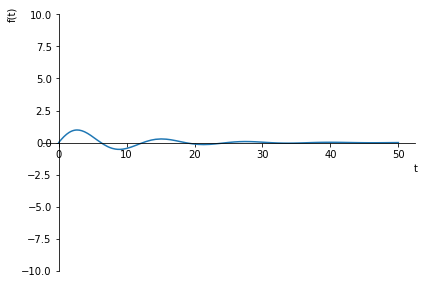

In [9]:
print('x[1] (Velocity):')
plot(velocity.subs(values).doit(), (t, 0, 50), ylim = [-10.0, 10.0])

## Python control library example

Symbolic solution (sympy):


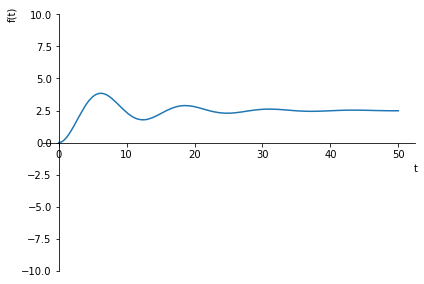

Python control library solution:


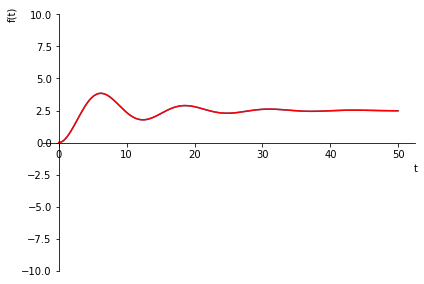

In [10]:
# Same solution derived using python control library:

from control.matlab import *
import numpy as np

AA = [[0, 1.], [-values[k]/values[m], -values[b]/values[m]]]
BB = [[0], [1./values[m]]]
CC = [[1., 0.]]
sys = ss(AA, BB, CC, 0)

yout, T = step(sys, np.arange(0, 50,0.1))


print('Symbolic solution (sympy):')
p = plot(position.subs(values).doit(), (t, 0, 50), ylim = [-10.0, 10.0])
fig = p._backend.fig
ax = fig.axes[0]

print('Python control library solution:')
ax.plot(T.T, yout.T,color='r')
fig


# Numeric solution

## Euler's method
Euler's equation can be derived in a numerous ways:

__From the definition of derivative:__
$$\dot{x} = \lim_{\delta t\to 0} \frac{\delta x}{\delta t}$$
for small delta t = h:
$$\dot{x}(t) \approx \frac{x(t+h)-x(t)}{h}$$
$$x(t+h)\approx x(t) + h*\dot{x}(t)$$

<br /><br />

__From Taylor expansion:__
$$x(t+h) = x(t) + h\dot{x}(t) + \frac{1}{2}h^2\ddot{x}(t)+O(h^3)$$
First two terms of the expansion form the equation of Euler's method.
Note that this gives us idea regarding method's error - which is of the order O(h^2)

<br /><br />

__From fundamental theorem of calculus:__

For a differential equation: $$\dot{x}(t)=f(t, x)$$
We integrate the equation and apply fundamental theorem of calculus:
$$x(t_0+h)-x(t_0)=\int_{t_0}^{t_0+h} f(t, x(t)) dt $$
We approximate the integral using left-hand rectangle method (with a single rectangle):
$$\int_{t_0}^{t_0+h} f(t, x(t)) dt \approx h*f(t_0, x(t_0))$$
and thus:
$$x(t_0+h) \approx x(t_0) + h*f(t_0, x(t_0))$$

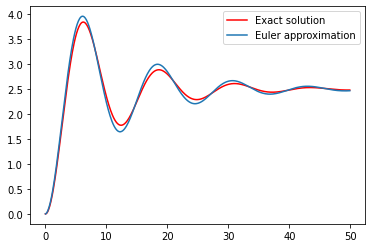

In [16]:
from numpy.linalg import inv
import numpy as np

F = 1.0
delta_t = 0.1
time = np.arange(0.0, 50.0, delta_t)

# initial state
y = np.array([[0],[0]])

AAA = np.array(AA)
BBB = np.array(BB)

Y = []
force = []

# time-stepping solution
for t in time:
    y = y + delta_t*AAA.dot(y) + delta_t*F*BBB
    Y.append(y[0])

# plot the result
tt = [i for i in time]

plt.plot(T.T, yout.T,color='r', label='Exact solution')
plt.plot(tt, Y, label='Euler approximation')
plt.legend()
